In [2]:
#import librarires
import kerastuner as kt
from tensorflow import keras
import tensorflow as tf
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameter as hp
from keras.layers import Dense,Dropout,Activation,Add,MaxPooling2D,Conv2D,Flatten,BatchNormalization
from keras.models import Sequential 
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from keras.applications import VGG16


C:\Users\rdeny\AppData\Local\Temp\ipykernel_2968\123328905.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [3]:
#splitting  train test data 
train_datagen = ImageDataGenerator(rescale=1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   vertical_flip =  True , 
                                   rotation_range=40,
                                   brightness_range = (0.5, 1.5),
                                   horizontal_flip = True,preprocessing_function=tf.keras.applications.vgg16.preprocess_input)


#train data with 224*224*3 size

train_data = train_datagen.flow_from_directory(r'D:\Kuliah\semester-5\machine-learning\project\pathole-detection-finalVer\dataset\train',
                                                 target_size = (244, 244),
                                                 class_mode='sparse',
                                                 shuffle=True,seed=1)

test_datagen = ImageDataGenerator(rescale = 1/255,preprocessing_function=tf.keras.applications.vgg16.preprocess_input)
test_data = test_datagen.flow_from_directory(r"D:\Kuliah\semester-5\machine-learning\project\pathole-detection-finalVer\dataset\test",
                                                           batch_size=32,
                                                           target_size=(244,244),
                                                           class_mode='sparse',
                                                           shuffle=True,seed=1)


Found 723 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [4]:
class_names = ["plain","pothole"]
for i in range(len(class_names)):
    print(i," ",class_names[i])

0   plain
1   pothole


In [5]:
vgg_model =  VGG16(include_top=True , weights='imagenet')
for models in vgg_model.layers:
  models.trainable= False
vgg_model = keras.Model(inputs=vgg_model.input, outputs=vgg_model.layers[-2].output)
model = keras.Sequential()
for layer in vgg_model.layers:
  model.add(layer)
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [6]:
#compile the model
model.compile(optimizer="adam", loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

#early stopping function
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [7]:
#fit the model
history=model.fit(train_data,
    validation_data = test_data, 
    callbacks=[early],
    epochs = 20)

Epoch 1/20


 5/23 [=====>........................] - ETA: 1:38 - loss: 3.3893 - accuracy: 0.4938

c:\Users\rdeny\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


23/23 [==============================] - 115s 5s/step - loss: 1.9365 - accuracy: 0.4758 - val_loss: 0.7149 - val_accuracy: 0.5000
Epoch 2/20
23/23 [==============================] - 105s 5s/step - loss: 0.7345 - accuracy: 0.5353 - val_loss: 0.6552 - val_accuracy: 0.5000
Epoch 3/20
23/23 [==============================] - 136s 6s/step - loss: 0.6824 - accuracy: 0.5906 - val_loss: 0.5165 - val_accuracy: 0.8125
Epoch 4/20
23/23 [==============================] - 130s 6s/step - loss: 0.4182 - accuracy: 0.8077 - val_loss: 0.4283 - val_accuracy: 0.8750
Epoch 5/20
23/23 [==============================] - 152s 7s/step - loss: 0.3177 - accuracy: 0.8672 - val_loss: 0.4409 - val_accuracy: 0.8750
Epoch 6/20
23/23 [==============================] - 131s 6s/step - loss: 0.3335 - accuracy: 0.8672 - val_loss: 0.5895 - val_accuracy: 0.6875
Epoch 7/20
23/23 [==============================] - 101s 4s/step - loss: 0.2297 - accuracy: 0.9198 - val_loss: 0.4825 - val_accuracy: 0.8750
Epoch 8/20
23/23 [======

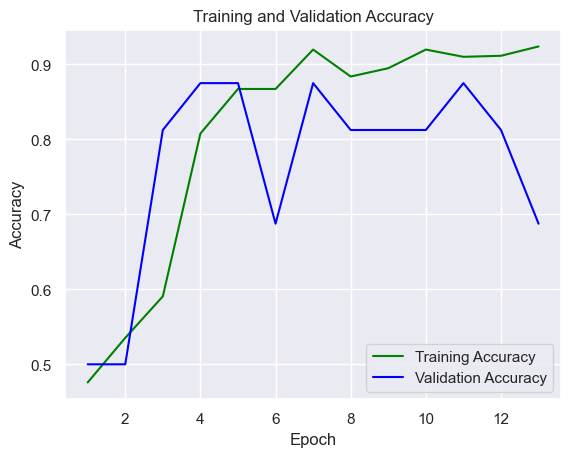

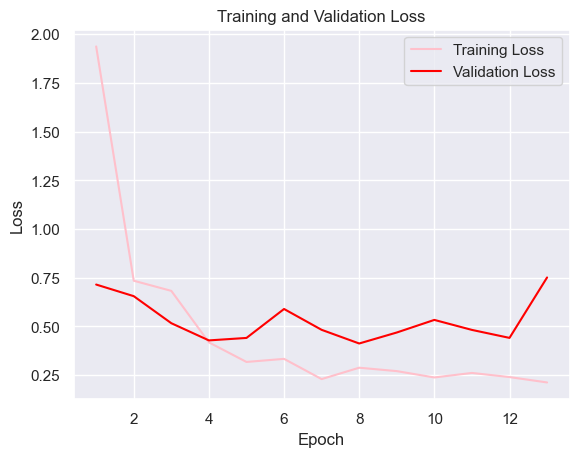

In [8]:
#plotting training values
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [9]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(test_data)

# Display the evaluation results with two decimal places
print(f"Test Loss: {round(loss * 100, 2)}%")
print(f"Test Accuracy: {round(accuracy * 100, 2)}%")

1/1 [==============================] - 2s 2s/step - loss: 0.7512 - accuracy: 0.6875
Test Loss: 75.12%
Test Accuracy: 68.75%


1/1 [==============================] - 1s 602ms/step
Predicted class index: 0
Predicted class: Plain


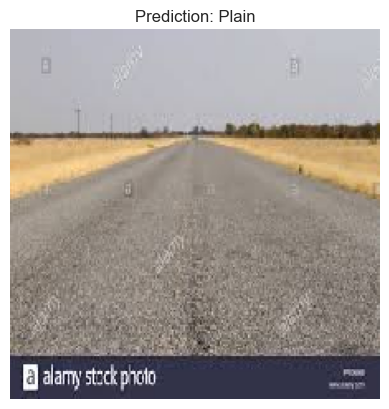

In [10]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
import random

# Paths to the directories containing images
directory_plain = r"D:\Kuliah\semester-5\machine-learning\project\pathole-detection-finalVer\dataset\test\Plain"
directory_pothole = r"D:\Kuliah\semester-5\machine-learning\project\pathole-detection-finalVer\dataset\test\Pothole"

# Get a list of all files in both directories
files_plain = os.listdir(directory_plain)
files_pothole = os.listdir(directory_pothole)

# Choose randomly from both directories
random_category = random.choice(['Plain', 'Pothole'])
if random_category == 'Plain':
    directory_to_use = directory_plain
else:
    directory_to_use = directory_pothole

random_file = random.choice(os.listdir(directory_to_use))
image_path = os.path.join(directory_to_use, random_file)

new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)

prediction = model.predict(img)
predicted_class = np.argmax(prediction, axis=1)

class_names = ['Plain', 'Pothole']  # List of class names based on your dataset

print("Predicted class index:", predicted_class[0])
print("Predicted class:", class_names[predicted_class[0]])

plt.imshow(new_img)
plt.axis('off')
plt.title(f"Prediction: {class_names[predicted_class[0]]}")
plt.show()


In [11]:
#predict model 
y_pred = model.predict(test_data)
y_pred =  np.argmax(y_pred,axis=1)

print(y_pred)

1/1 [==============================] - 3s 3s/step
[0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1]
